In [2]:
import os, sys

# Şu an src/notebooks içindeyiz → 2 kez .. ile uav-weedseg köküne çıkıyoruz
project_root = os.path.abspath(os.path.join("..", ".."))
print("Proje kökü:", project_root)

sys.path.append(project_root)
%matplotlib inline
from src.datasets.weedsgalore import WeedsGaloreDataset


Proje kökü: C:\Users\SEZİN\uav-weedseg


In [3]:
import importlib
import src.datasets.weedsgalore as wg

importlib.reload(wg)
from src.datasets.weedsgalore import WeedsGaloreDataset


In [4]:
# Root: hangi date klasörünü kullanmak istiyorsan onu seç
root_dir = r"C:\Users\SEZİN\uav-weedseg\data\raw\weeds_galore\date1"

# Split dosyası (train.txt içinde id'ler var)
split_file = r"C:\Users\SEZİN\uav-weedseg\src\datasets\splits\train.txt"

dataset = WeedsGaloreDataset(
    root_dir=root_dir,
    split_file=split_file,
    transform=None
)

print("Toplam örnek sayısı:", len(dataset))


Toplam örnek sayısı: 104


In [5]:
def __getitem__(self, idx):
    img_id = self.image_ids[idx]
    bands = ["R", "G", "B", "NIR", "RE"]
    image_channels = []

    found = False
    for date_folder in ["date1", "date2", "date3", "date4"]:
        base_path = os.path.join(self.root_dir, date_folder, "images")
        band_path = os.path.join(base_path, f"{img_id}_R.png")
        if os.path.exists(band_path):
            found = True
            break

    if not found:
        raise FileNotFoundError(f"{img_id} not found in any date folder")

    for b in bands:
        band_path = os.path.join(base_path, f"{img_id}_{b}.png")
        band_img = np.array(Image.open(band_path))
        image_channels.append(band_img)

    image = np.stack(image_channels, axis=-1)

    semantic_mask = np.array(Image.open(os.path.join(base_path.replace("images", "semantic_masks"), f"{img_id}.png")))
    binary_mask   = np.array(Image.open(os.path.join(base_path.replace("images", "instance_masks"), f"{img_id}.png")))

    return image, semantic_mask, binary_mask


In [6]:
print("Toplam örnek sayısı:", len(dataset))

# 5 farklı örneğin ID'sini yazdır
for i in range(5):
    print(f"{i}. id:", dataset.image_ids[i])


Toplam örnek sayısı: 104
0. id: 2023-06-15_0472
1. id: 2023-06-15_0763
2. id: 2023-06-15_0157
3. id: 2023-06-15_1056
4. id: 2023-06-15_0454


In [7]:
root_dir = r"C:\Users\SEZİN\uav-weedseg\data\raw\weeds_galore"
split_file = r"C:\Users\SEZİN\uav-weedseg\src\datasets\splits\train.txt"

dataset = WeedsGaloreDataset(root_dir, split_file)

print("Toplam örnek:", len(dataset))

img, semantic_mask, binary_mask = dataset[0]
print("Image shape:", img.shape)            
print("Semantic mask shape:", semantic_mask.shape)
print("Binary mask shape:", binary_mask.shape)


Toplam örnek: 104
Image shape: (600, 600, 5)
Semantic mask shape: (600, 600)
Binary mask shape: (600, 600)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4928..65024].


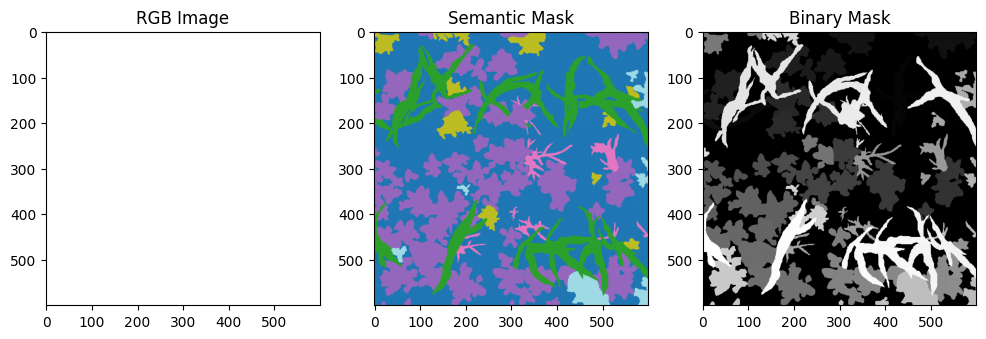

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# RGB göster (ilk 3 kanal)
axs[0].imshow(img[:, :, :3])
axs[0].set_title("RGB Image")

# Semantic mask
axs[1].imshow(semantic_mask, cmap="tab20")
axs[1].set_title("Semantic Mask")

# Binary mask
axs[2].imshow(binary_mask, cmap="gray")
axs[2].set_title("Binary Mask")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4992..64960].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [8192..65280].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5696..65088].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [7488..65216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6592..65280].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [8064..65344].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [11392..65280].
Clipping input data to the valid range for imshow with

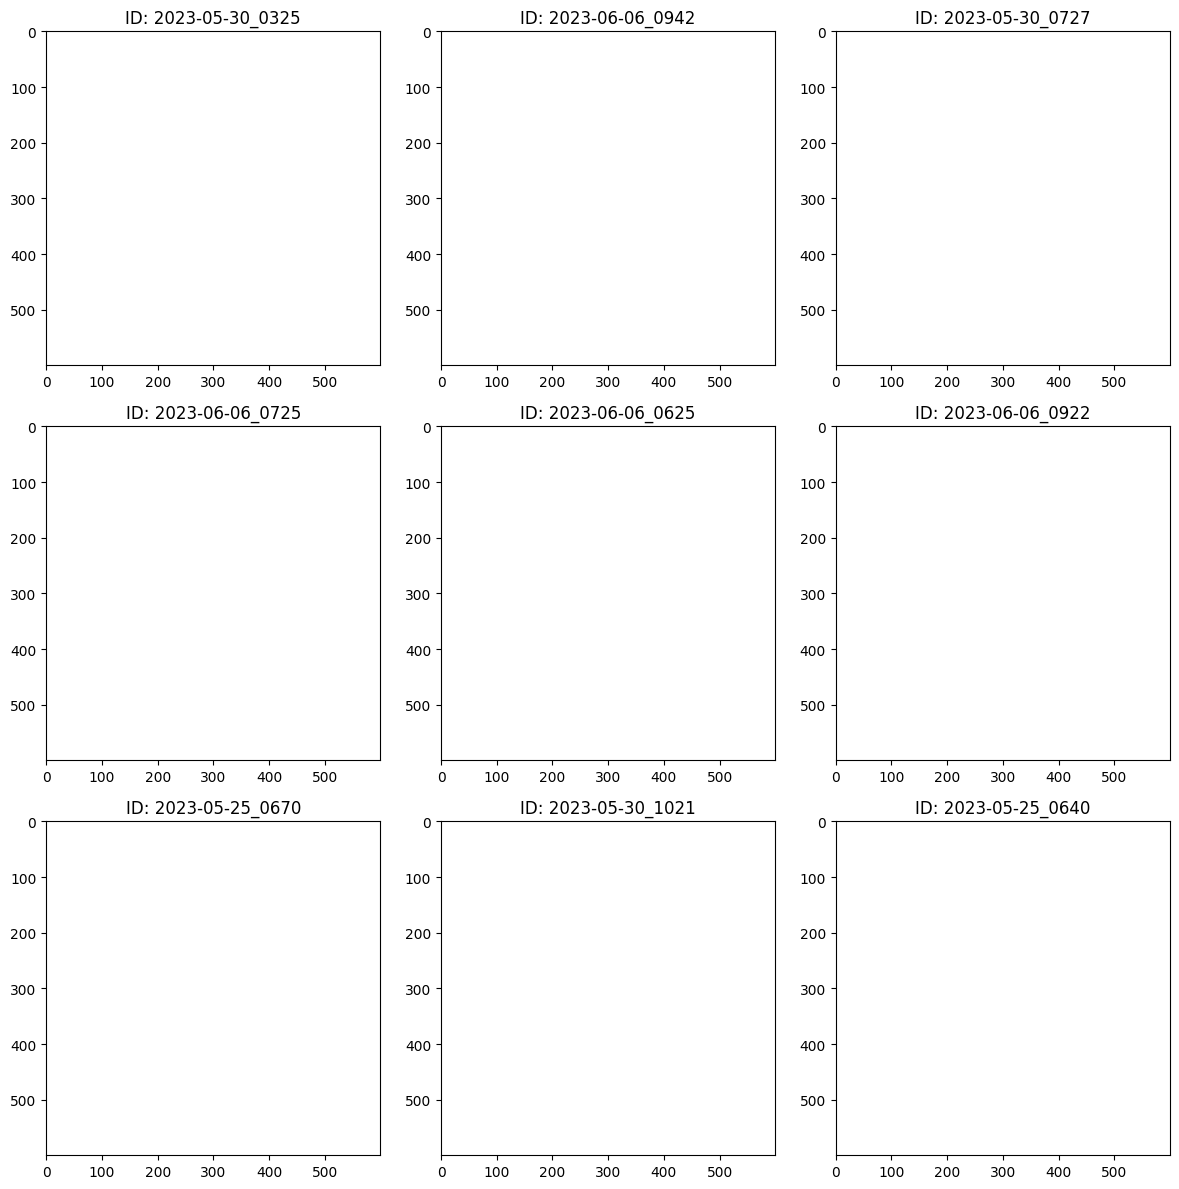

In [9]:
import random

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i in range(9):
    idx = random.randint(0, len(dataset)-1)
    img, semantic_mask, binary_mask = dataset[idx]

    axs[i//3, i%3].imshow(img[:, :, :3])
    axs[i//3, i%3].set_title(f"ID: {dataset.image_ids[idx]}")
    axs[i//3, i%3].axis("on")

plt.tight_layout()
plt.show()


In [10]:
import numpy as np

all_classes = []
for i in range(50):  # ilk 50 örneğe bakalım
    _, semantic_mask, _ = dataset[i]
    all_classes.extend(np.unique(semantic_mask))

print("Verilen örneklerdeki unique sınıflar:", np.unique(all_classes))


Verilen örneklerdeki unique sınıflar: [0 1 2 3 4 5]


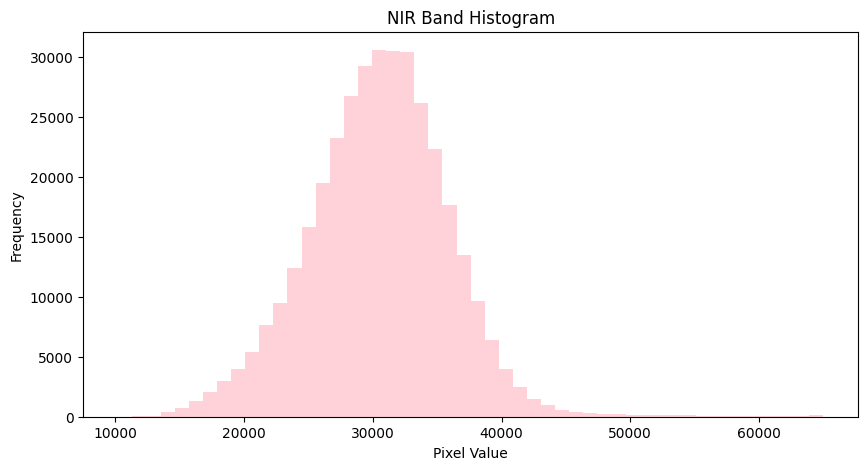

In [11]:
plt.figure(figsize=(10,5))
plt.hist(img[:, :, 3].ravel(), bins=50, color="pink", alpha=0.7)
plt.title("NIR Band Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


Sınıf dağılımı (piksel sayıları):
Class 0: 34950932 piksel
Class 1: 915459 piksel
Class 2: 1016336 piksel
Class 3: 336285 piksel
Class 4: 67903 piksel
Class 5: 153085 piksel


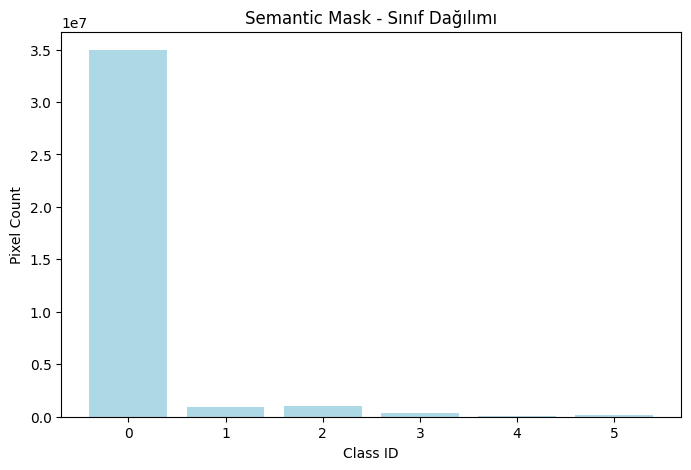

Sınıf oranları (%): {np.uint8(0): np.float64(93.35), np.uint8(1): np.float64(2.45), np.uint8(2): np.float64(2.71), np.uint8(3): np.float64(0.9), np.uint8(4): np.float64(0.18), np.uint8(5): np.float64(0.41)}

Instance sayısı istatistikleri:
Ortalama: 76.63461538461539
Minimum: 13
Maksimum: 255


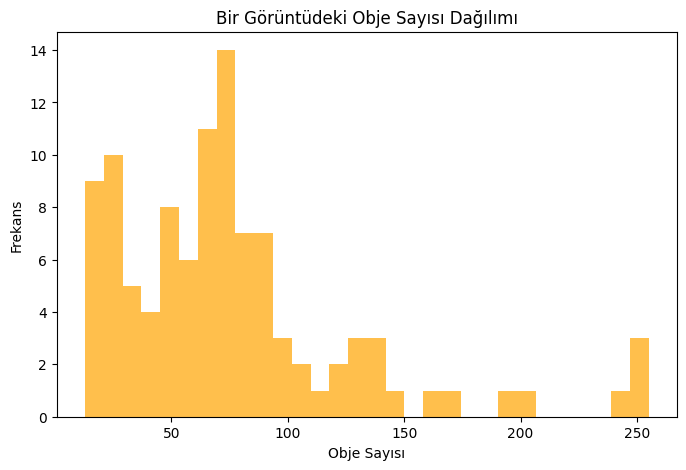


Dataset içinde farklı boyutlar: {(600, 600, 5)}


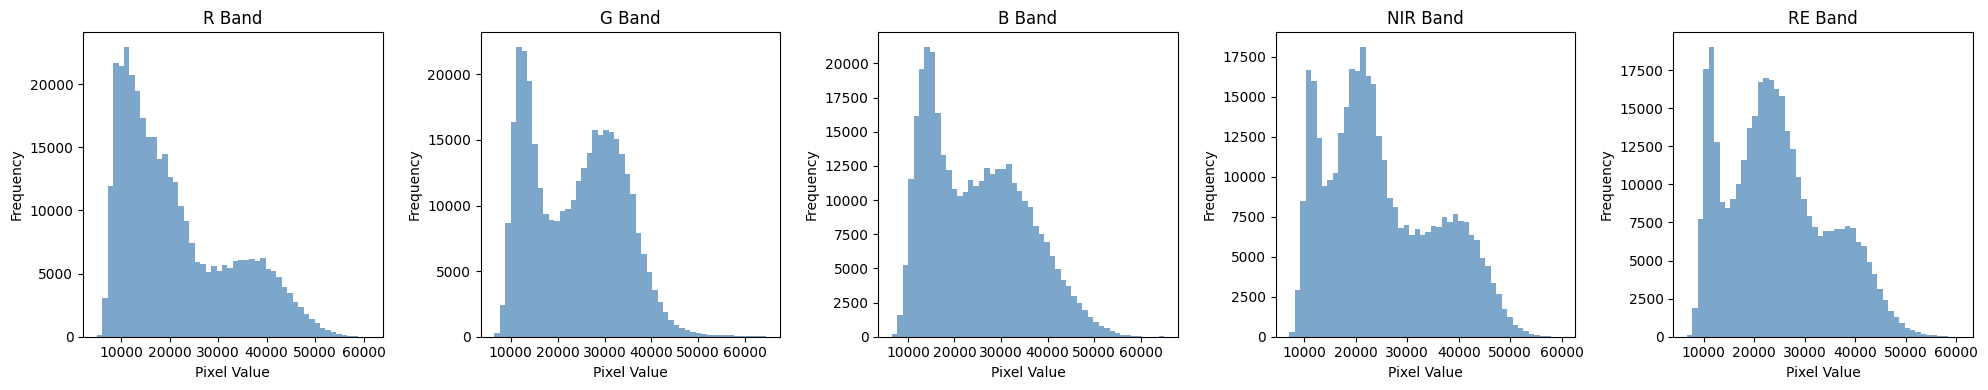

In [12]:
import collections
import numpy as np
import matplotlib.pyplot as plt

# 1) Sınıf dağılımı analizi
class_counts = collections.Counter()

for i in range(len(dataset)):
    _, semantic_mask, _ = dataset[i]
    unique, counts = np.unique(semantic_mask, return_counts=True)
    for u, c in zip(unique, counts):
        class_counts[u] += c

print("Sınıf dağılımı (piksel sayıları):")
for cls, count in class_counts.items():
    print(f"Class {cls}: {count} piksel")

plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color="lightblue")
plt.xlabel("Class ID")
plt.ylabel("Pixel Count")
plt.title("Semantic Mask - Sınıf Dağılımı")
plt.show()

total_pixels = sum(class_counts.values())
class_ratios = {cls: round(count/total_pixels*100, 2) for cls, count in class_counts.items()}
print("Sınıf oranları (%):", class_ratios)

# 2) Instance sayısı analizi
instance_counts = []
for i in range(len(dataset)):
    _, _, binary_mask = dataset[i]
    n_instances = len(np.unique(binary_mask)) - (1 if 0 in np.unique(binary_mask) else 0)
    instance_counts.append(n_instances)

print("\nInstance sayısı istatistikleri:")
print("Ortalama:", np.mean(instance_counts))
print("Minimum:", np.min(instance_counts))
print("Maksimum:", np.max(instance_counts))

plt.figure(figsize=(8,5))
plt.hist(instance_counts, bins=30, color="orange", alpha=0.7)
plt.title("Bir Görüntüdeki Obje Sayısı Dağılımı")
plt.xlabel("Obje Sayısı")
plt.ylabel("Frekans")
plt.show()

# 3) Görüntü boyutları
shapes = set()
for i in range(min(len(dataset), 50)):
    img, _, _ = dataset[i]
    shapes.add(img.shape)
print("\nDataset içinde farklı boyutlar:", shapes)

# 4) Band histogramları (ilk örnek üzerinden)
img, _, _ = dataset[0]
band_names = ["R", "G", "B", "NIR", "RE"]

fig, axs = plt.subplots(1, 5, figsize=(20,4))
for i, b in enumerate(range(5)):
    axs[i].hist(img[:,:,b].ravel(), bins=50, alpha=0.7, color="steelblue")
    axs[i].set_title(f"{band_names[i]} Band")
    axs[i].set_xlabel("Pixel Value")
    axs[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


In [13]:
import numpy as np

print("Semantic mask unique values:", np.unique(semantic_mask))
print("Binary mask unique values:", np.unique(binary_mask))


Semantic mask unique values: [0 1 2 3 4 5]
Binary mask unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4928..65024].


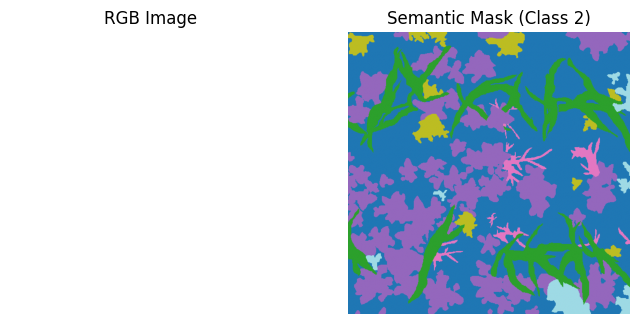

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5056..64896].


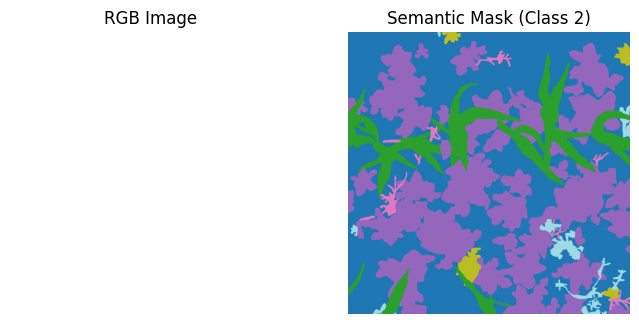

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [9280..65216].


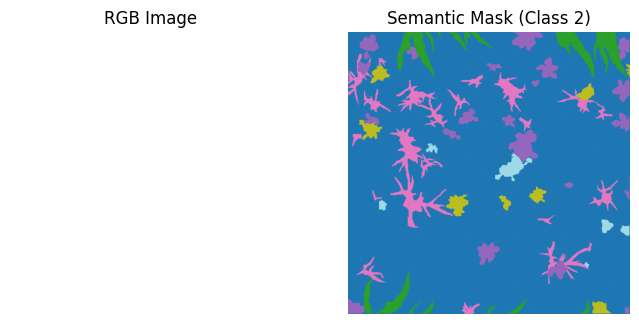

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def show_examples_for_class(dataset, target_class, n_examples=3):
    shown = 0
    for i in range(len(dataset)):
        img, semantic_mask, _ = dataset[i]

        # Eğer bu semantic mask içinde target_class varsa
        if target_class in np.unique(semantic_mask):
            fig, axs = plt.subplots(1, 2, figsize=(8,4))
            
            # RGB görüntü (ilk 3 band)
            axs[0].imshow(img[:,:,:3])
            axs[0].set_title("RGB Image")
            axs[0].axis("off")

            # Semantic mask
            axs[1].imshow(semantic_mask, cmap="tab20")
            axs[1].set_title(f"Semantic Mask (Class {target_class})")
            axs[1].axis("off")

            plt.show()

            shown += 1
            if shown >= n_examples:
                break

# Örnek: Class 2 (Broadleaf weed) için 3 örnek gösterelim
show_examples_for_class(dataset, target_class=2, n_examples=3)


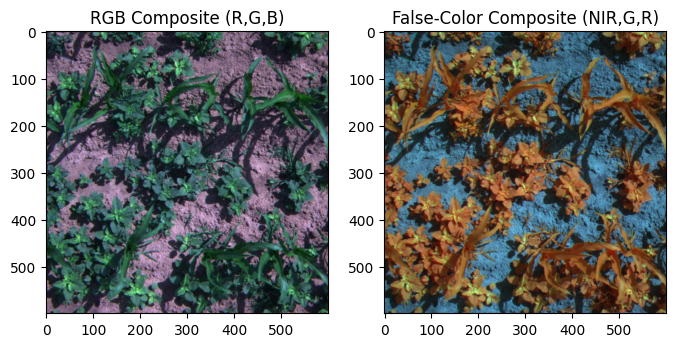

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1 örnek al
img, _, _ = dataset[0]

# Normal RGB (R,G,B = 0,1,2)
rgb = img[:, :, [0,1,2]].astype(float)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())  # [0,1] aralığına ölçekle

# False-color (NIR,G,R = 3,1,0)
false_color = img[:, :, [3,1,0]].astype(float)
false_color = (false_color - false_color.min()) / (false_color.max() - false_color.min())

fig, axs = plt.subplots(1, 2, figsize=(8,6))

axs[0].imshow(rgb)
axs[0].set_title("RGB Composite (R,G,B)")

axs[1].imshow(false_color)
axs[1].set_title("False-Color Composite (NIR,G,R)")

plt.show()


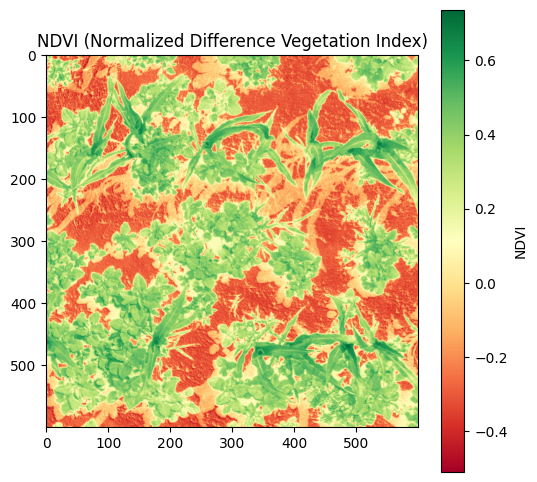

In [21]:
# 1 örnek al
img, _, _ = dataset[0]

# NIR = band 3, R = band 0 (bizim sıramıza göre kontrol et!)
nir = img[:, :, 3].astype(float)
red = img[:, :, 0].astype(float)

# NDVI = (NIR - R) / (NIR + R)
ndvi = (nir - red) / (nir + red + 1e-6)  # sıfıra bölmeyi engellemek için +1e-6

plt.figure(figsize=(6,6))
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar(label="NDVI")
plt.title("NDVI (Normalized Difference Vegetation Index)")
plt.show()


In [25]:
import numpy as np

# Daha önce hesapladığımız class_counts kullanılıyor
total_pixels = sum(class_counts.values())

# class_weights = toplam_piksel / (sınıf_sayısı * sınıf_pikselleri)
n_classes = len(class_counts)
class_weights = {cls: total_pixels / (n_classes * count) for cls, count in class_counts.items()}

print("Class Weights:", class_weights)


Class Weights: {np.uint8(0): np.float64(0.17853601157188026), np.uint8(1): np.float64(6.816252830547299), np.uint8(2): np.float64(6.139701830890572), np.uint8(3): np.float64(18.55568937062313), np.uint8(4): np.float64(91.8957925275761), np.uint8(5): np.float64(40.76166835418232)}


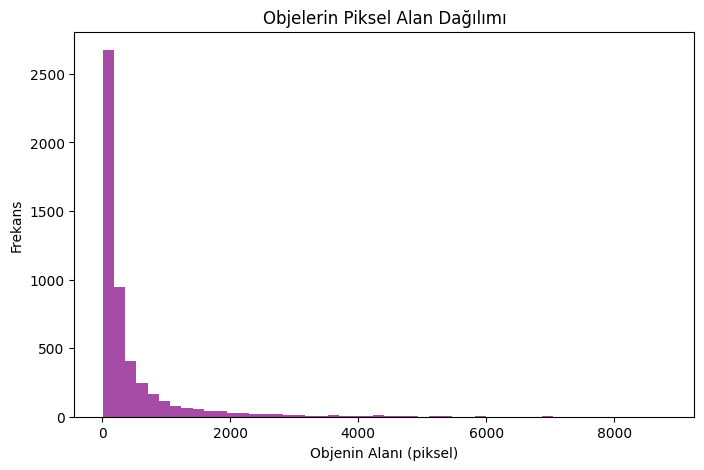

Ortalama obje alanı: 424.9122009096302
Minimum: 4
Maksimum: 8812


In [27]:
import cv2

object_sizes = []

for i in range(min(len(dataset), 50)):  # çok uzun olmasın diye ilk 50 görüntü
    _, _, binary_mask = dataset[i]
    instance_ids = np.unique(binary_mask)
    instance_ids = instance_ids[instance_ids != 0]  # background hariç
    
    for obj_id in instance_ids:
        obj_area = np.sum(binary_mask == obj_id)
        object_sizes.append(obj_area)

plt.figure(figsize=(8,5))
plt.hist(object_sizes, bins=50, color="purple", alpha=0.7)
plt.title("Objelerin Piksel Alan Dağılımı")
plt.xlabel("Objenin Alanı (piksel)")
plt.ylabel("Frekans")
plt.show()

print("Ortalama obje alanı:", np.mean(object_sizes))
print("Minimum:", np.min(object_sizes))
print("Maksimum:", np.max(object_sizes))

